# Selection of teams to replicate for the analytic variability experiment 

In [1]:
import numpy as np
import pandas as pd 

In [2]:
file = pd.read_excel("/home/analytic_variability_fmri/data/original/analysis_pipelines_for_analysis.xlsx", 
                     sheet_name="Sheet1", usecols = "A:AY", 
                    header = 1)

After manually analyzing the **"softwares"** column of this file, we decided to exclude teams that used custom build softwares or softwares different from SPM, AFNI, FSL, ANTS or nistat. 

## Teams to exclude 

In [3]:
team_ID_to_exclude = []
index_to_exclude = [0, 15, 20, 42, 45, 49, 55, 56, 66, 67]
for i in index_to_exclude:
    team_ID_to_exclude.append(file.loc[i]['teamID'])
    
df_to_exclude = file.iloc[index_to_exclude]

In [4]:
team_ID_to_exclude

['50GV',
 'C22U',
 '94GU',
 '0H5E',
 'R42Q',
 '16IN',
 '1K0E',
 'X1Z4',
 'XU70',
 '0ED6']

- **50GV** : Utilisation script 'Denoiser' disponible sur GitHub, possiblement reproducible mais à voir si vraiment utilisé ? 
- **C22U** : Utilisation custom script MatLab pour : extraire les composants PCA de la white matter. "We used the average time-course of the white matter as a counfound regressor, as well as a selection of PCA components extracted from the white matter compartments. Specifically, for each PCA component, a linear regressor analysis was performed with the PCA component timeseries as the output and 12 motion regressors (6 motion parameter timeseries extracted from volume realignment plus their 1st temporal derivatives) as explanatory variables. PCA components whose model yielded correlation coefficient above 65% were considered as nuisance regressors in the first-level analysis. Overall, this analysis returned between 5 and 15 nuissance regressors for each run. Typically, higher number of nuissance regressors was linked to higher mean framewise displacement." Est ce qu'on reproduit ? 
- **94GU** : Utilisation Artifact Detection Tools (ART) https://www.nitrc.org/projects/artifact_detect/ RRID:SCR_005994 and aCompCor in PhysIO TOOLBOX (TAPAS software collection) https://www.tnu.ethz.ch/en/software/tapas/documentations/physio-toolbox.html. Avec un peu de recherche, surement reproducible mais est ce que vraiment on le reproduit ? 
- **05HE** : Utilisation SPM8, est ce que les fonctions sont assez ressemblantes pour utiliser SPM12 ? 
- **R42Q** : Utilisation fmriflows pour le préprocessing, est ce que ça ressemble assez à fmriprep pour utiliser ces données ? 
- **16IN** : Utilisation de R pour l'analyse 2nd niveau
- **1K0E** et **X1Z4** : Utilisation HCP workbench
- **XU70** : Utilisation 4DRealign pour preprocessing
- **0ED6** : Utilisation DVARS http://www.nisox.org/Software/DSE/ ???

## How many pipelines to select ? 

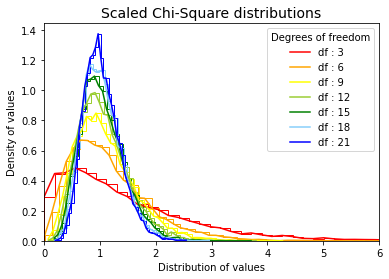

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
for df, colors in [(3, 'red'), (6, 'orange'), (9, 'yellow'), 
                   (12, 'yellowgreen'), (15, 'green'),
                   (18, 'lightskyblue'), (21, 'blue')]:   
    x = chi2.rvs(df, size=15000) / (df-1)
    n, bins, patches = plt.hist(x, 50, density=True, color = colors, 
                                histtype = 'step')

    plt.plot(bins[:-1], n, '-', label = f"df : {df}", color = colors)
    plt.xlim(0, 6)
    plt.legend(title = 'Degrees of freedom')
    plt.ylabel('Density of values')
    plt.xlabel('Distribution of values')
    plt.title('Scaled Chi-Square distributions', fontsize=14)
    plt.savefig("/Users/elodiegermani/Desktop/STAGE/rapport/chi_square.png")

## Team selection

In [6]:
df = pd.DataFrame(columns = ['id', 'softwares_exp', 'softwares', 'preprocessed_data', 'type_of_testing'], 
                  index = range(0, 70))

In [7]:
for i in range(0, 70):
    if file.loc[i]['teamID'] in team_ID_to_exclude or len(file.loc[i]['teamID']) != 4:
        continue
    df.loc[i]['id'] = file.loc[i]['teamID']
    df.loc[i]['softwares_exp'] = file.loc[i]['softwares']
    df.loc[i]['softwares'] = file.loc[i]['analysis_SW']
    df.loc[i]['preprocessed_data'] = file.loc[i]['used_fmriprep_data'][0]
    df.loc[i]['type_of_testing'] = file.loc[i]['testing']

df = df.dropna()
df["preprocessed_data"][df["preprocessed_data"]=="Y"] = 1
df["preprocessed_data"][df["preprocessed_data"]=="N"] = 0

In [8]:
df_SPM = df[df['softwares_exp'].str.contains('SPM') & df['softwares'].str.contains('SPM')]
df_FSL = df[df['softwares_exp'].str.contains('FSL') & df['softwares'].str.contains('FSL')]
df_AFNI = df[df['softwares_exp'].str.contains('AFNI') & df['softwares'].str.contains('AFNI')]
df_nistat = df[df['softwares_exp'].str.contains('nistats') & df['softwares'].str.contains('nistats')]

We decided to choose 6 teams for each software (SPM, FSL and AFNI) and 3 for nistats. The choice has to be random and there must not be any duplicate. 

In [17]:
df_to_replicate = pd.concat([df_SPM[df_SPM['id'].isin(['2T6S', 'C88N', 'Q6O0'])], 
                            df_SPM[df_SPM['preprocessed_data'] == 0].sample(3),
                            df_FSL[df_FSL['id'] == '4TQ6'],
                            df_FSL[df_FSL['preprocessed_data'] == 1].sample(2), 
                            df_FSL[df_FSL['preprocessed_data'] == 0].sample(3),
                            df_AFNI[df_AFNI['preprocessed_data'] == 1].sample(3),
                            df_AFNI[df_AFNI['preprocessed_data'] == 0].sample(3),
                            df_nistat.sample(3)], axis = 0)

In [18]:
df_to_replicate_global = file.loc[list(df_to_replicate.index.values)]

In [19]:
df_to_replicate_global.to_csv("../results/narps_team_to_replicate.csv", sep = ";", index = False)

In [20]:
df_to_replicate

id                                      softwares_exp     softwares  \
5   C88N                              SPM12 - version 7219            SPM   
8   2T6S                           SPM12 , \nfmriprep 1.1.4           SPM   
44  Q6O0       SPM 12 v7219 ,\nFSL current fmriprep version           SPM   
30  0I4U                                           SPM 7487           SPM   
65  98BT                                              SPM12           SPM   
63  IZ20               SPM12-7219 ;\nAFNI macos_10.12_local     SPM, AFNI   
6   4TQ6                             FSL 5.0.4 and Feat v6            FSL   
37  R7D1  FSL 5.0.9 ,\nAFNI 17.0.13, Precompiled binary ...     FSL, AFNI   
27  X19V               FSL version 5.0.9; FEAT version 6.00           FSL   
38  Q58J  FSL 5.0.11 ,\nAnts/3.0.0.0, nilearn/0.5.0, nip...           FSL   
4   43FJ                              FSL Feat version 6.00           FSL   
41  1KB2                                           FSL 6.0            FSL   
35  80GC  we used AFNI v 18.2.19  (built September 27 2018)          AFNI   
58  E6R3  Sorry for being a bit difficult but I’m unsure...   AFNI, other   
68  I07H               FSL 5.0.9 ,\nAFNI_19.0.14 'Tiberius'     FSL, AFNI   
59  27SS                                       AFNI 18.3.12          AFNI   
57  I9D6  AFNI Version: AFNI_19.0.24 'Tiberius',  https:...          AFNI   
63  IZ20               SPM12-7219 ;\nAFNI macos_10.12_local     SPM, AFNI   
61  AO86  FSL 5.0.7 ;\nnistats version 0.0.1b  , nilearn...  FSL, nistats   
10  0JO0                           nistats (version 0.0.1a)       nistats   
53  9U7M  SPM ;\nFSL Version 6.0.0 implemented with nipy...       nistats   

   preprocessed_data type_of_testing  
5                  1      parametric  
8                  1      parametric  
44                 1      parametric  
30                 0      parametric  
65                 0      parametric  
63                 0      parametric  
6                  1       randomise  
37                 1       randomise  
27                 1      parametric  
38                 0      parametric  
4                  0      parametric  
41                 0      parametric  
35                 1      parametric  
58                 1           Other  
68                 1    permutations  
59                 0      parametric  
57                 0      parametric  
63                 0      parametric  
61                 1       randomise  
10                 1      parametric  
53                 0      parametric

## Participants selection

Selection of participants to analyze to represent subdatasets of size n=20, n=40 and n=60. 

In [1]:
import random
import os 
from os.path import join as opj

In [2]:
# Important directories
## exp_dir : where the data are stored (where the ds001734 directory is stored)
exp_dir = '/data/ds001734-download'

## result_dir : where the intermediate and final results will be store
result_dir = "/home/analytic_variability_fmri/data/derived/reproduced"

participants_file = opj(exp_dir, 'participants.tsv')

In [3]:
dir_list = os.listdir(exp_dir)

# Subject list (to which we will do the analysis)
total_subject_list = []
for dirs in dir_list:
    if dirs[0:3] == 'sub':
        total_subject_list.append(dirs[-3:])

In [4]:
equalIndifference_id = []
equalRange_id = []

with open(participants_file, 'rt') as f:
    next(f)  # skip the header

    for line in f:
        info = line.strip().split()
        
        if info[0][-3:] in total_subject_list and info[1] == "equalIndifference":
            equalIndifference_id.append(info[0][-3:])
        elif info[0][-3:] in total_subject_list and info[1] == "equalRange":
            equalRange_id.append(info[0][-3:])

In [10]:
n_val = [20, 40, 60, 80, 108]
sub_dict = {}

In [11]:
random.shuffle(equalIndifference_id)
random.shuffle(equalRange_id)

In [12]:
for n in n_val:
    subs = equalRange_id[0:int(n/2)] + equalIndifference_id[0:int(n/2)]
    
    sub_dict.update({str(n) : subs})

In [13]:
print(sub_dict)

{'20': ['020', '070', '120', '118', '002', '018', '046', '066', '098', '116', '001', '013', '109', '035', '025', '053', '073', '121', '011', '087'], '40': ['020', '070', '120', '118', '002', '018', '046', '066', '098', '116', '008', '106', '004', '104', '092', '090', '016', '124', '088', '094', '001', '013', '109', '035', '025', '053', '073', '121', '011', '087', '069', '095', '113', '115', '089', '045', '117', '093', '021', '041'], '60': ['020', '070', '120', '118', '002', '018', '046', '066', '098', '116', '008', '106', '004', '104', '092', '090', '016', '124', '088', '094', '062', '040', '084', '056', '064', '044', '060', '112', '050', '082', '001', '013', '109', '035', '025', '053', '073', '121', '011', '087', '069', '095', '113', '115', '089', '045', '117', '093', '021', '041', '017', '083', '107', '119', '103', '057', '061', '085', '027', '059'], '80': ['020', '070', '120', '118', '002', '018', '046', '066', '098', '116', '008', '106', '004', '104', '092', '090', '016', '124', '0